# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

### (2) 데이터 로딩
* 주어진 데이터셋
    * [1.전처리 단계]에서 저장한 파일 : data1pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 3) 데이터 읽어오기

In [3]:
import joblib

data = joblib.load('/content/drive/MyDrive/16 Mini Project06/3-4일차. 장애인 이동권 개선을 위한 장애인 콜택시 대기시간 예측/data1.pkl')

In [4]:
data.head()

,Date,operation,receive,board,mean_waiting_time,mean_fare,mean_distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),day_of_week,month,year,season,holiday,mean_waiting_time_MA7,boarding_rate
0,2015-01-02,420,3158,2839,26.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66,Fri,Jan,2015,Winter,0,26.200000,89.898670
1,2015-01-03,209,1648,1514,24.5,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32,Sat,Jan,2015,Winter,0,25.350000,91.868932
2,2015-01-04,196,1646,1526,26.2,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48,Sun,Jan,2015,Winter,0,25.633333,92.709599
3,2015-01-05,421,4250,3730,23.6,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47,Mon,Jan,2015,Winter,0,25.125000,87.764706
4,2015-01-06,417,3991,3633,24.7,2211,8545,-1.0,-8.8,0.0,42.0,24.0,10.12,Tue,Jan,2015,Winter,0,25.040000,91.029817


## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [5]:
# 숫자형 변수 분석
def num_analysis(data, feature, bins=20):
    # 기초통계량
    display(pd.DataFrame(data[feature].describe()))
    
    # 시각화
    plt.figure(figsize=(8, 4))
    plt.hist(data[feature], bins=bins, edgecolor='black')
    plt.xlabel(feature)
    plt.show()

In [6]:
# 범주형 변수 분석
def cat_analysis(data, feature):
    # 범주별 빈도수 / 범주별 비율
    temp = pd.DataFrame(data[feature].value_counts())
    temp['rate'] = pd.DataFrame(data[feature].value_counts() / data.shape[0])
    display(temp)

    # 시각화
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[feature])
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

In [7]:
data.columns

Index(['Date', 'operation', 'receive', 'board', 'mean_waiting_time',
       'mean_fare', 'mean_distance', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'day_of_week',
       'month', 'year', 'season', 'holiday', 'mean_waiting_time_MA7',
       'boarding_rate'],
      dtype='object')

,operation
count,2921.000000
mean,418.771311
std,133.725082
min,132.000000
25%,278.000000
50%,454.000000
75%,522.000000
max,1413.000000


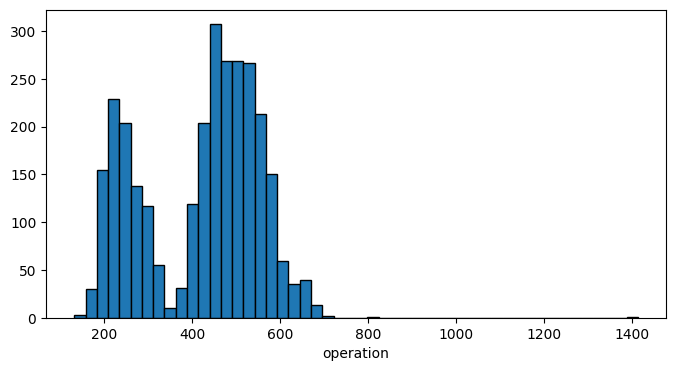

In [8]:
num_analysis(data, 'operation', 50)

,receive
count,2921.000000
mean,3926.433413
std,1509.267575
min,527.000000
25%,2162.000000
50%,4721.000000
75%,5110.000000
max,6182.000000


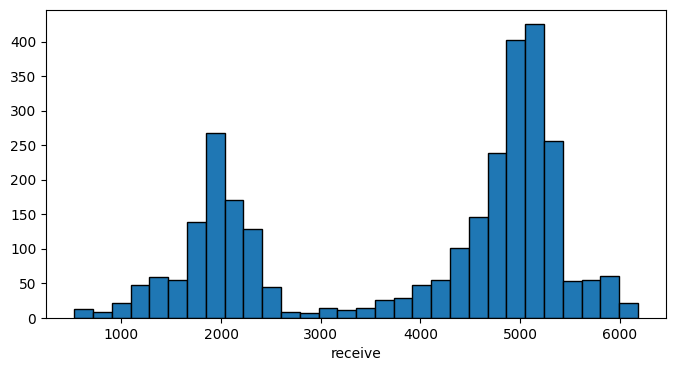

In [9]:
num_analysis(data, 'receive', 30)

,board
count,2921.000000
mean,3284.547758
std,1248.828360
min,462.000000
25%,1779.000000
50%,3933.000000
75%,4241.000000
max,5189.000000


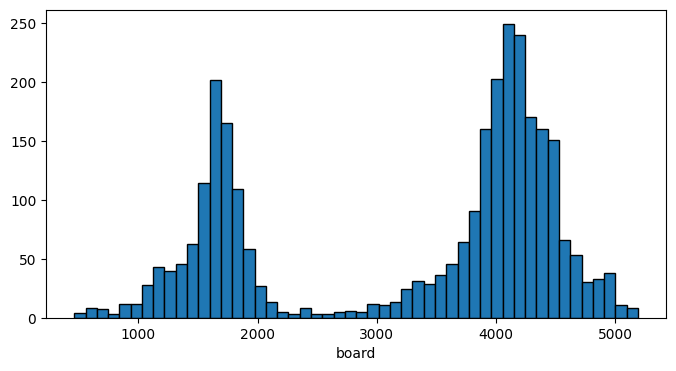

In [10]:
num_analysis(data, 'board', 50)

,mean_waiting_time
count,2921.000000
mean,40.314071
std,14.093919
min,17.600000
25%,29.600000
50%,38.200000
75%,48.600000
max,96.100000


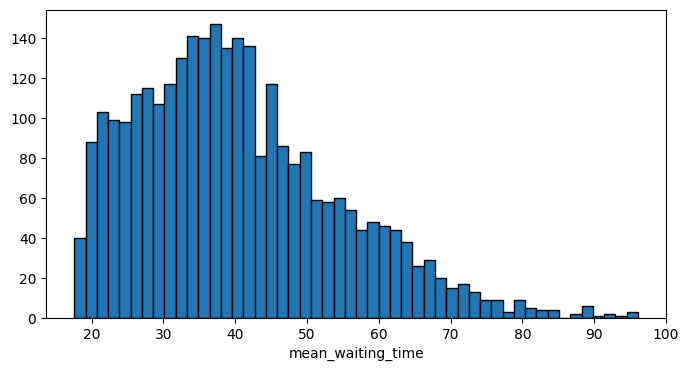

In [11]:
num_analysis(data, 'mean_waiting_time', 50)

,mean_fare
count,2921.000000
mean,2304.315645
std,107.364236
min,2131.000000
25%,2228.000000
50%,2257.000000
75%,2401.000000
max,2733.000000


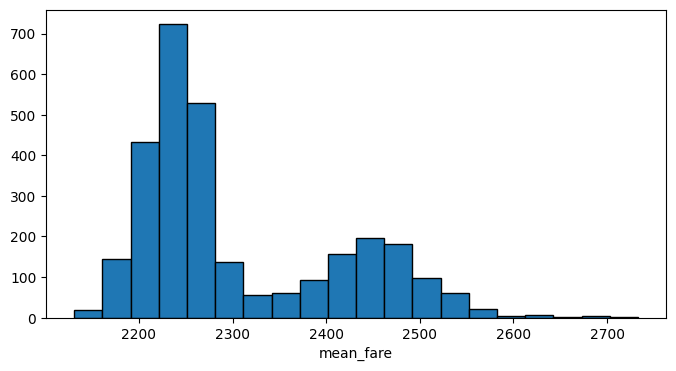

In [12]:
num_analysis(data, 'mean_fare')

,mean_distance
count,2921.000000
mean,9253.774392
std,1020.028028
min,7672.000000
25%,8521.000000
50%,8821.000000
75%,10154.000000
max,14136.000000


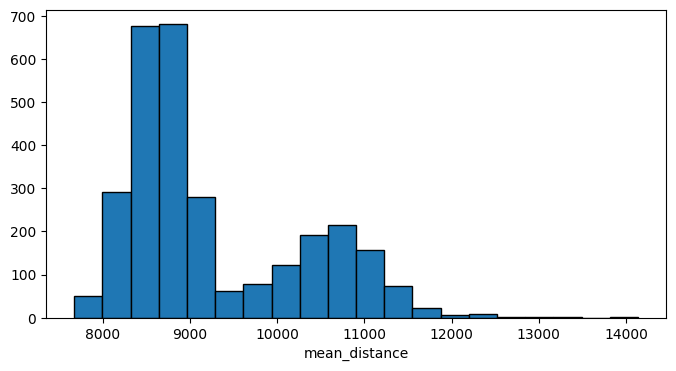

In [13]:
num_analysis(data, 'mean_distance')

,rain(mm)
count,2921.000000
mean,3.356761
std,12.597807
min,0.000000
25%,0.000000
50%,0.000000
75%,0.300000
max,178.900000


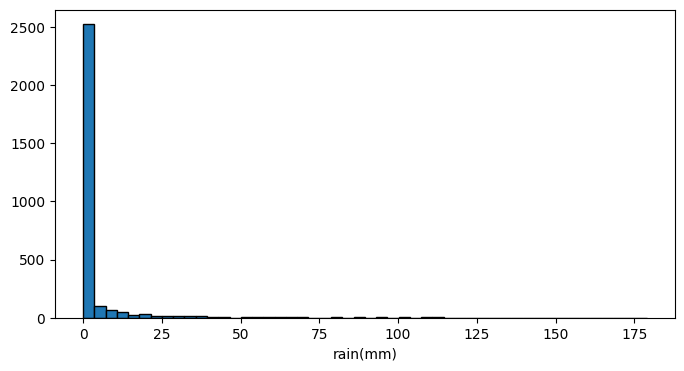

In [14]:
num_analysis(data, 'rain(mm)', 50)

,sunshine(MJ/m2)
count,2921.000000
mean,13.497987
std,6.940870
min,0.000000
25%,8.240000
50%,12.680000
75%,18.580000
max,30.790000


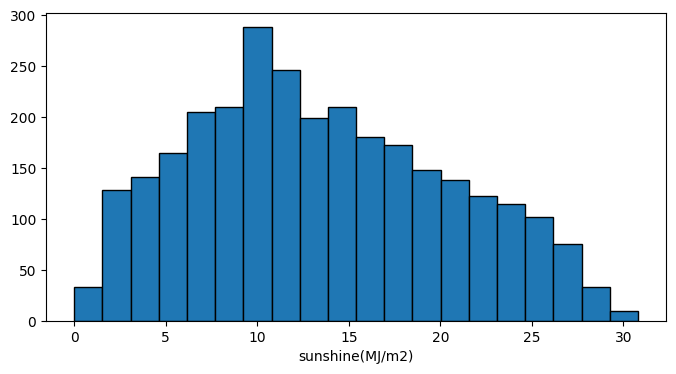

In [15]:
num_analysis(data, 'sunshine(MJ/m2)')

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

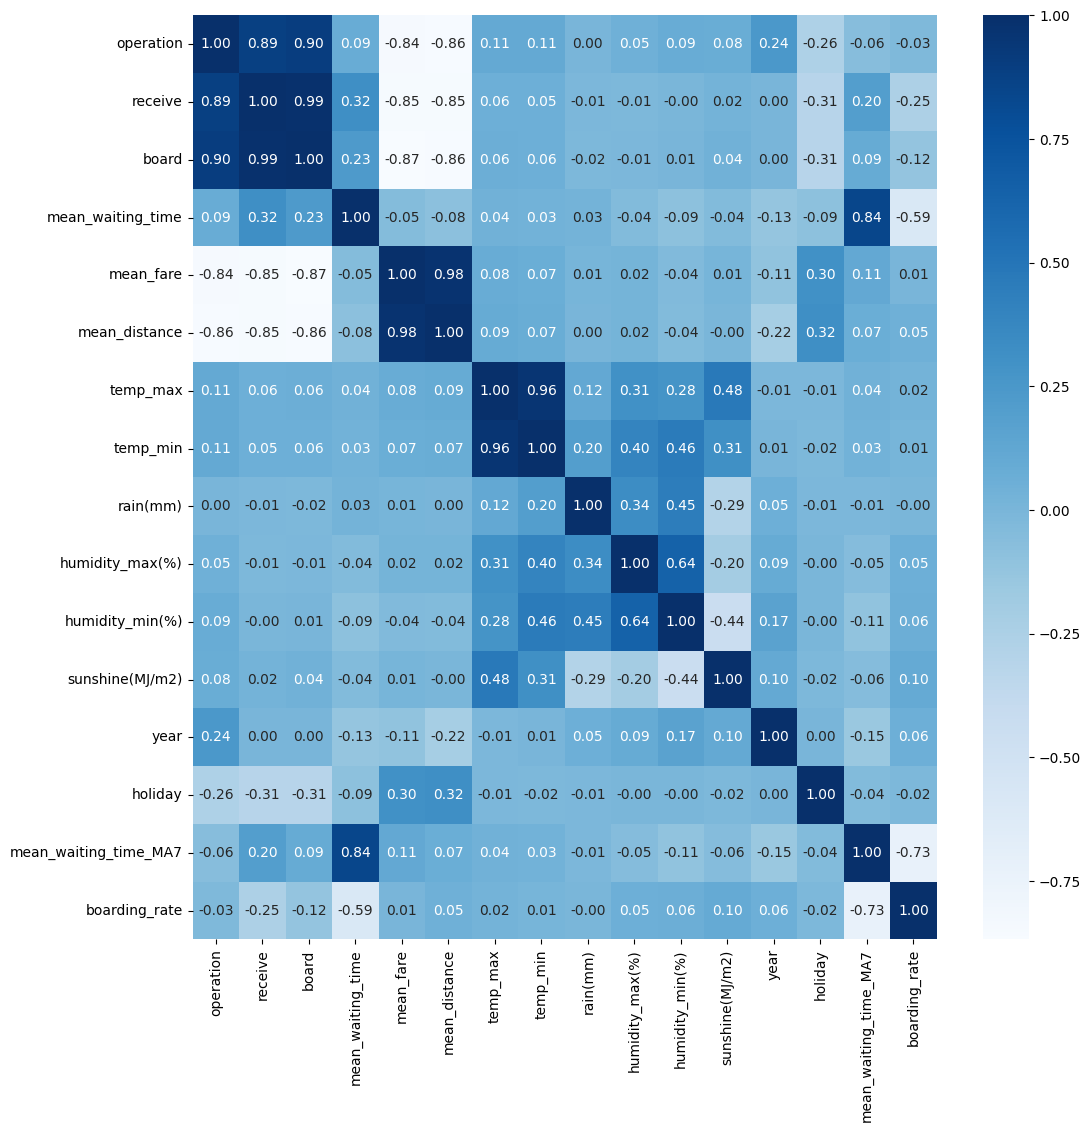

In [16]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues')
plt.show()

#### 2) 산점도

<Figure size 1200x600 with 0 Axes>

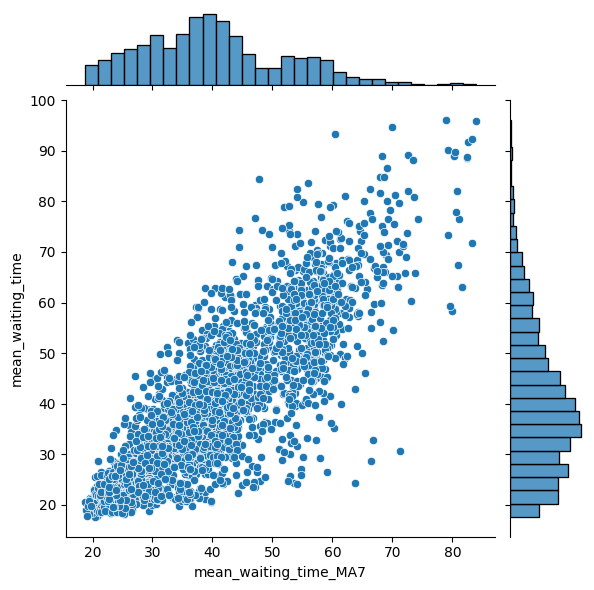

In [17]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='mean_waiting_time_MA7', y='mean_waiting_time', data=data)
plt.show()

<Figure size 1200x600 with 0 Axes>

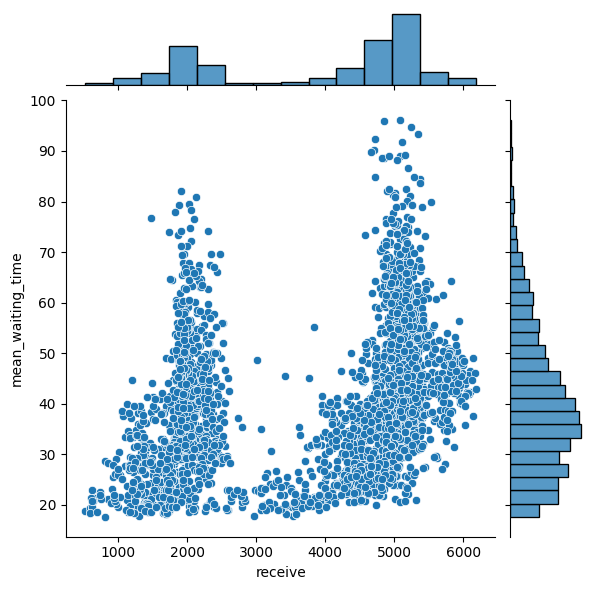

In [18]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='receive', y='mean_waiting_time', data=data)
plt.show()

<Figure size 1200x600 with 0 Axes>

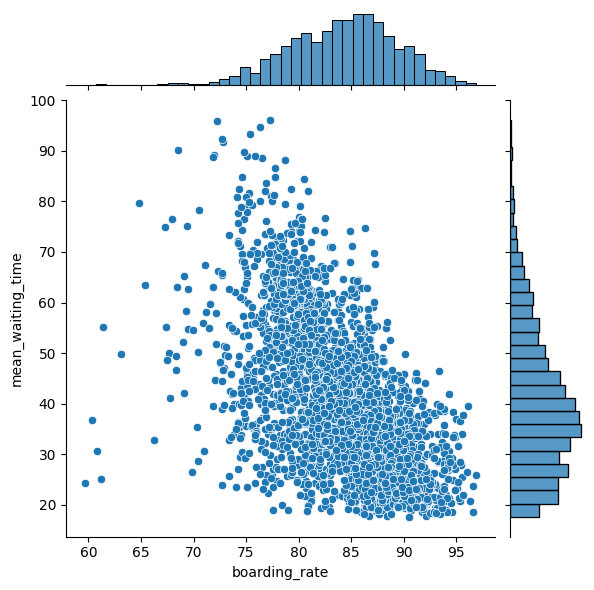

In [19]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='boarding_rate', y='mean_waiting_time', data=data)
plt.show()

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

In [20]:
# day_of_week
from scipy import stats as spst

d1 = data.loc[data['day_of_week'] == 'Mon', 'mean_waiting_time']
d2 = data.loc[data['day_of_week'] == 'Tue', 'mean_waiting_time']
d3 = data.loc[data['day_of_week'] == 'Wed', 'mean_waiting_time']
d4 = data.loc[data['day_of_week'] == 'Thu', 'mean_waiting_time']
d5 = data.loc[data['day_of_week'] == 'Fri', 'mean_waiting_time']
d6 = data.loc[data['day_of_week'] == 'Sat', 'mean_waiting_time']
d7 = data.loc[data['day_of_week'] == 'Sun', 'mean_waiting_time']

spst.f_oneway(d1, d2, d3, d4, d5, d6, d7)

F_onewayResult(statistic=15.70648843740594, pvalue=7.893036239927777e-18)

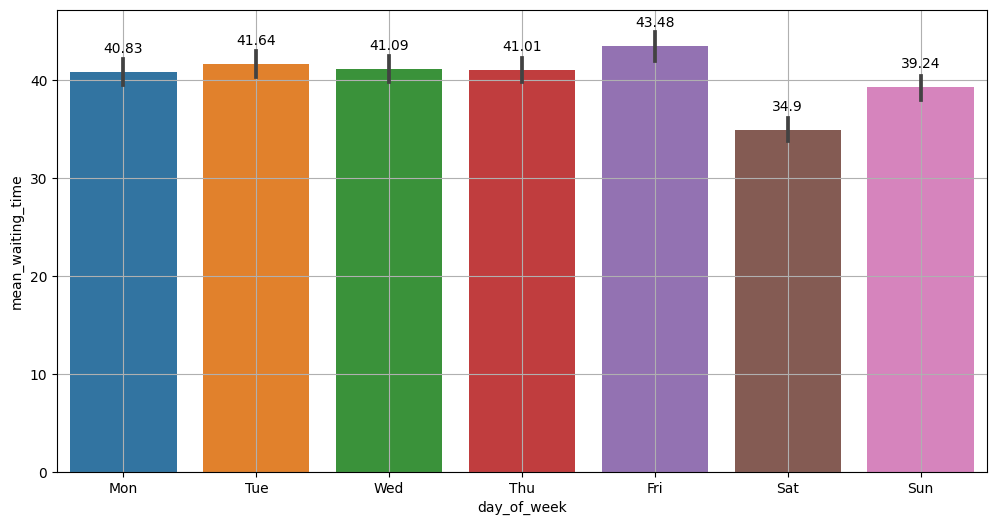

In [21]:
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='day_of_week', y='mean_waiting_time', data=data)
for b in bars.patches:
    height = b.get_height()
    bars.text(b.get_x() + b.get_width()/2, height+2, round(height, 2), ha='center', size=10)
plt.grid()
plt.show()

In [22]:
# month
from scipy import stats as spst

m1 = data.loc[data['month'] == 'Jan', 'mean_waiting_time']
m2 = data.loc[data['month'] == 'Feb', 'mean_waiting_time']
m3 = data.loc[data['month'] == 'Mar', 'mean_waiting_time']
m4 = data.loc[data['month'] == 'Apr', 'mean_waiting_time']
m5 = data.loc[data['month'] == 'May', 'mean_waiting_time']
m6 = data.loc[data['month'] == 'Jun', 'mean_waiting_time']
m7 = data.loc[data['month'] == 'Jul', 'mean_waiting_time']
m8 = data.loc[data['month'] == 'Aug', 'mean_waiting_time']
m9 = data.loc[data['month'] == 'Sept', 'mean_waiting_time']
m10 = data.loc[data['month'] == 'Oct', 'mean_waiting_time']
m11 = data.loc[data['month'] == 'Nov', 'mean_waiting_time']
m12 = data.loc[data['month'] == 'Dec', 'mean_waiting_time']

spst.f_oneway(m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12)

F_onewayResult(statistic=25.830828836575108, pvalue=8.57464916473514e-52)

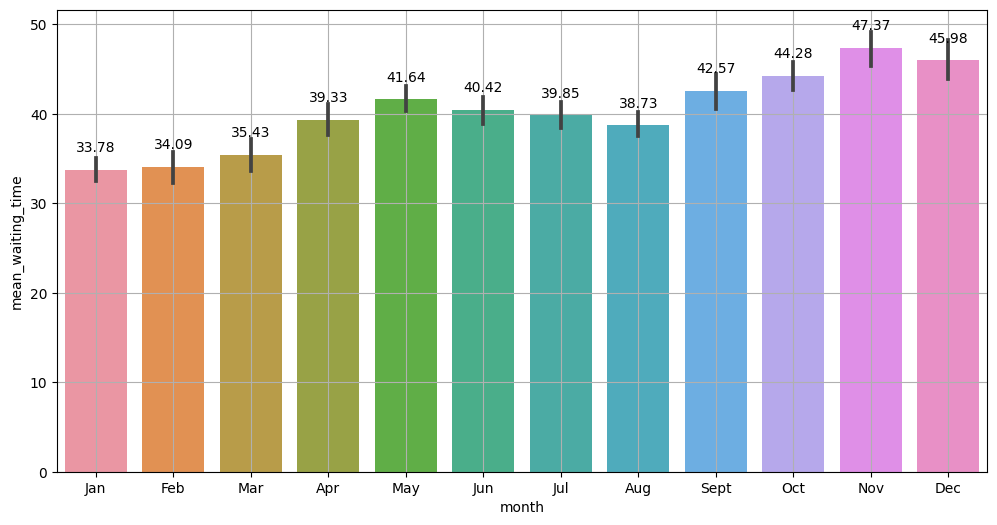

In [23]:
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='month', y='mean_waiting_time', data=data)
for b in bars.patches:
    height = b.get_height()
    bars.text(b.get_x() + b.get_width()/2, height+2, round(height, 2), ha='center', size=10)
plt.grid()
plt.show()

In [24]:
# season
from scipy import stats as spst

s1 = data.loc[data['season'] == 'Spring', 'mean_waiting_time']
s2 = data.loc[data['season'] == 'Summer', 'mean_waiting_time']
s3 = data.loc[data['season'] == 'Fall', 'mean_waiting_time']
s4 = data.loc[data['season'] == 'Winter', 'mean_waiting_time']

spst.f_oneway(s1, s2, s3, s4)

F_onewayResult(statistic=34.5779719669393, pvalue=5.9195793849517e-22)

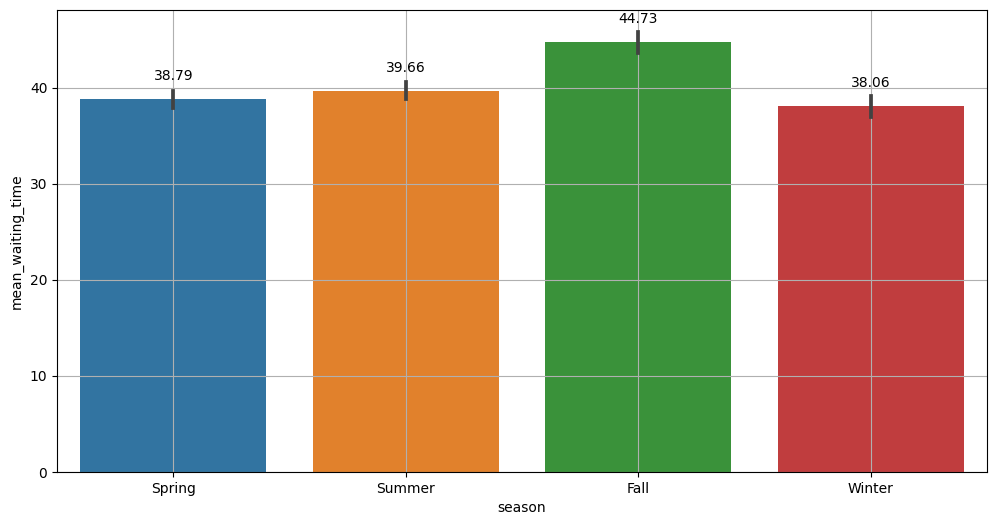

In [25]:
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='season', y='mean_waiting_time', data=data)
for b in bars.patches:
    height = b.get_height()
    bars.text(b.get_x() + b.get_width()/2, height+2, round(height, 2), ha='center', size=10)
plt.grid()
plt.show()

In [26]:
# holiday
from scipy import stats as spst

holiday = data.loc[data['holiday'] == 1, 'mean_waiting_time']
day = data.loc[data['holiday'] == 0, 'mean_waiting_time']

spst.ttest_ind(holiday, day)

Ttest_indResult(statistic=-4.951172680409455, pvalue=7.796178139842223e-07)

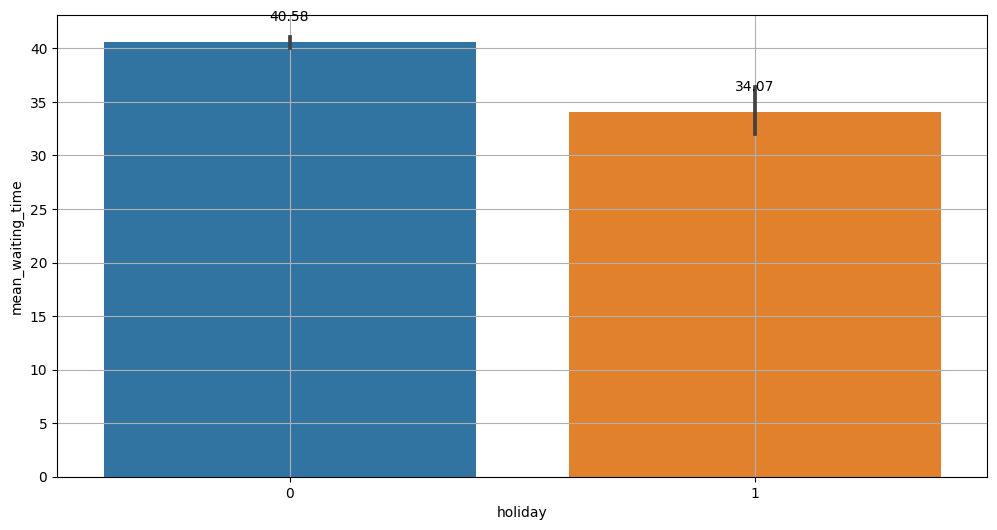

In [27]:
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='holiday', y='mean_waiting_time', data=data)
for b in bars.patches:
    height = b.get_height()
    bars.text(b.get_x() + b.get_width()/2, height+2, round(height, 2), ha='center', size=10)
plt.grid()
plt.show()

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [27]:
# mean_waiting_time_MA7
# boarding_rate

* 중간(약한) 관계의 변수

In [27]:
# receive
# board

* (거의) 관계가 없는 변수

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [28]:
import joblib

path = '/content/drive/MyDrive/16 Mini Project06/3-4일차. 장애인 이동권 개선을 위한 장애인 콜택시 대기시간 예측/'
joblib.dump(data, path + 'data2.pkl')

['/content/drive/MyDrive/16 Mini Project06/3-4일차. 장애인 이동권 개선을 위한 장애인 콜택시 대기시간 예측/data2.pkl']